In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from array import *
from PIL import Image
import imageio

In [2]:
m=1000
x_train=np.random.uniform(-10,10, size=(m,2))
y_train =np.zeros(shape=(m,1), dtype='int32')
np.random.seed()
for i in range (m):
    np.random.seed()
    coef=np.random.randint(0,2)
    if ((coef == 1) and (x_train[i][0] *x_train[i][0]<75)):
        x_train[i][1] = x_train[i][0] *x_train[i][0] 
        y_train[i] = 1
    if(coef == 0):
        x_train[i][1] = np.random.uniform(-100, 100)
        y_train[i] = 0

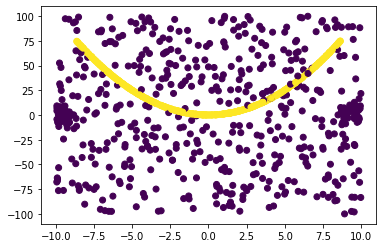

In [3]:
x = [0]*m
y = [0]*m
color = [0]*m
for i in range (m):
    x[i] = x_train[i][0]
    y[i] = x_train[i][1]
    if (y_train[i] ==1):
        color[i]=1
 
plt.scatter(x,y, c = color)

In [4]:
discriminator=tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


W1025 21:56:06.976579 17016 deprecation.py:506] From I:\Anaconda\envs\neural\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
optimizer = tf.keras.optimizers.Adam(0.0001)
discriminator.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=discriminator.fit(x_train, y_train, epochs=500,verbose=0)
print(history.history['loss'][499])
print(history.history['acc'][499])

W1025 21:56:07.048387 17016 deprecation.py:323] From I:\Anaconda\envs\neural\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0.2540834549665451
0.907


In [29]:
generator=tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=5),
    tf.keras.layers.Dense(2, activation='linear'),
])


In [7]:
def visualisation(array_points,counter,epoch):
    a= [0]*counter
    b= [0]*counter
    
    for i in range (counter):
        a[i] = array_points[i][0]
        b[i] = array_points[i][1]    
 
    plt.scatter(a,b)
    plt.xlim(-10,10)
    plt.ylim(-100,100)
    plt.title(epoch)
    image=plt.show()
    return image

In [8]:
def plot_dots(epoch,generator, examples):
    noise = np.random.normal(0, 1, size=[examples, 5])
    generated_points = generator.predict(noise)
    

In [30]:
def build_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = tf.keras.layers.Input(shape=(5,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = tf.keras.models.Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [ ]:


def train(epochs,frames):
    
    point_batch=np.random.uniform(size=(2500,2))
    
    gan=build_gan(discriminator, generator)
    for i in range(1,epochs+1):
        

        y_dis = np.zeros(5000)
        for j in range (0,2500):   
            np.random.seed()
            f=np.random.randint(0, 1000)
            point_batch[j] = x_train[f]
            y_dis[j] = y_train[f]
            
        noise = np.random.normal(-1, 1, size=[2500, 5])        
        generated_points = generator.predict(noise)
        
        if((i%frames==0) and (i !=0)): visualisation(generated_points,2500,i)        
            
            
        X = np.concatenate([point_batch,  generated_points],axis=0)        
        
        
               
        discriminator.trainable = True
        
        discriminator.train_on_batch(X, y_dis)
        
        noise = np.random.normal(-1, 1, size=[5000,5])
        
        y_gen = np.ones(5000)
        
        discriminator.trainable = False
        
        gan.train_on_batch(noise, y_gen)
        

In [ ]:
train(40000,500)

In [27]:
def train2(epochs,frames):
    
    point_batch=np.random.uniform(size=(500,2))
    
    gan=build_gan(discriminator, generator)
    for i in range(1,epochs+1):
        

        y_dis = np.zeros(1000)
        for j in range (0,500):   
            np.random.seed()
            point_batch[j][0]=np.random.uniform(-10,10)
            point_batch[j][1] = point_batch[j][0]* point_batch[j][0]
            y_dis[j] = 1
            
        noise = np.random.normal(-1, 1, size=[500, 5])        
        generated_points = generator.predict(noise)
        
        if((i%frames==0) and (i !=0)): visualisation(generated_points,500,i)        
            
            
        X = np.concatenate([point_batch,  generated_points],axis=0)        
        
        
               
        discriminator.trainable = True
        
        discriminator.train_on_batch(X, y_dis)
        
        noise = np.random.normal(-1, 1, size=[500,5])
        
        y_gen = np.ones(500)
        
        discriminator.trainable = False
        
        gan.train_on_batch(noise, y_gen)

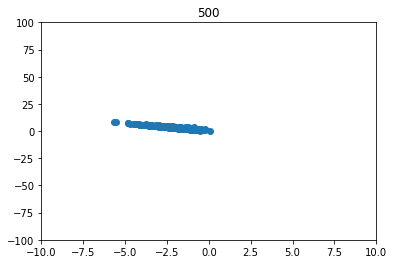

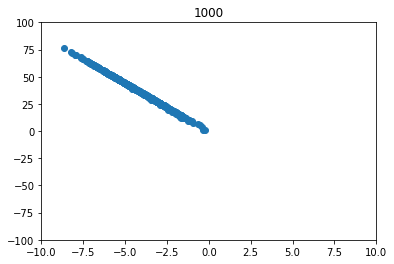

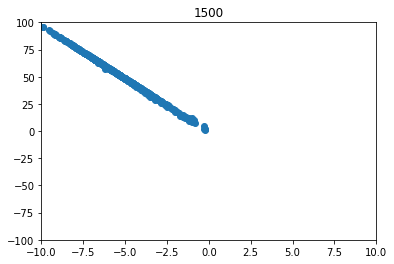

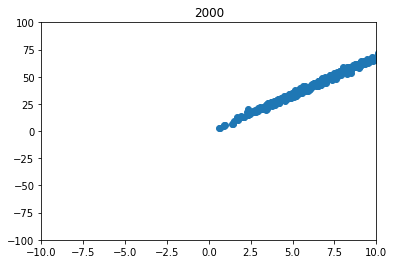

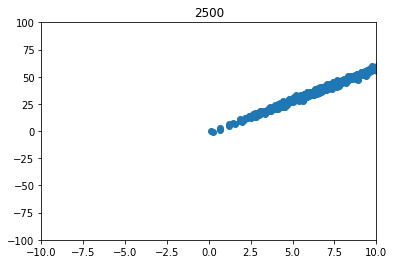

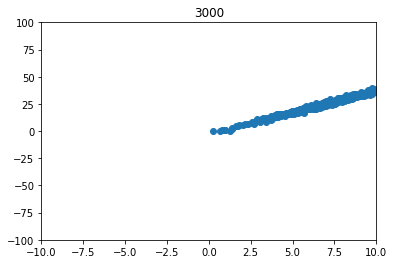

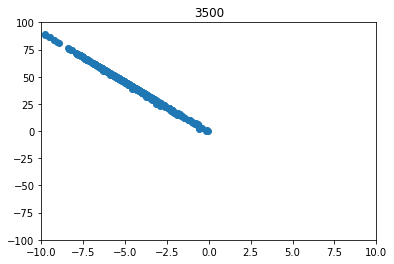

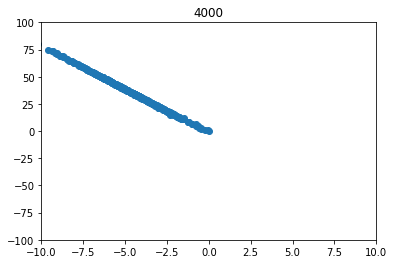

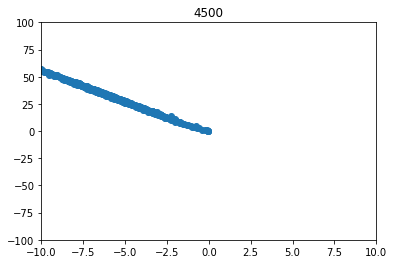

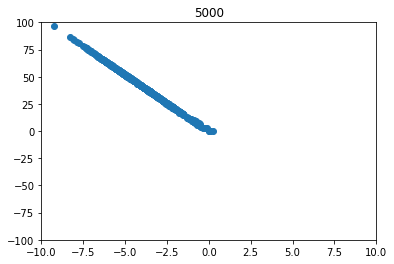

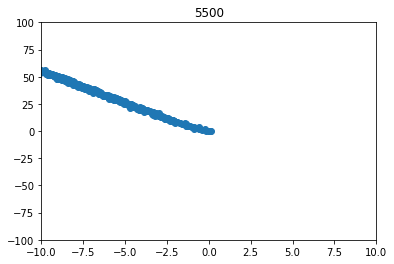

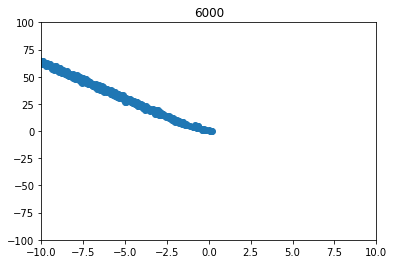

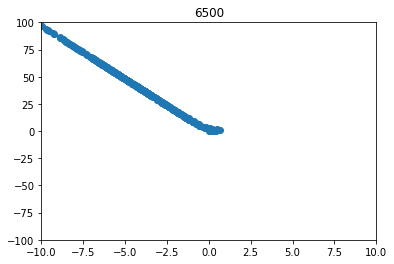

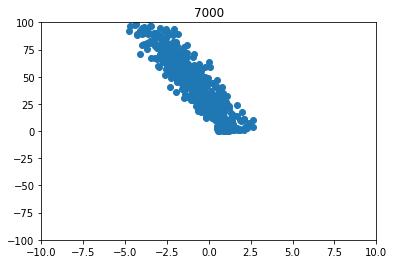

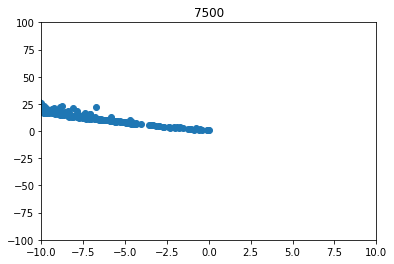

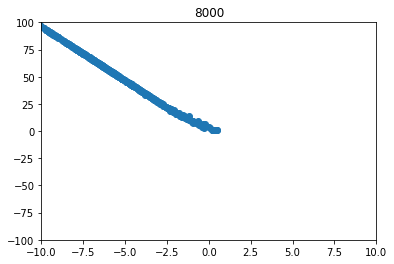

In [ ]:
train2(20000,500)